In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 샘플데이터

iris 붓꽃 샘플데이터를 가져옵니다.

In [7]:
from sklearn.datasets import load_iris
iris  = load_iris()

iris_df = pd.DataFrame(iris.data)
iris_df.head()

iris_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Boxplot으로 이상치 확인

`Boxplot을 통해서 이상치를 가지고 있는 Feature를 확인할 수 있다.`

`2번째 Feature, Sepal Width`

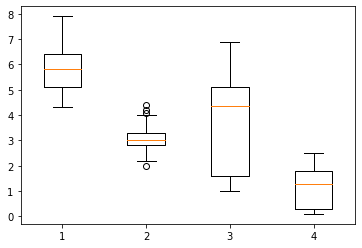

In [12]:
plt.boxplot(iris_df)
plt.show()

### StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

new_data = StandardScaler().fit_transform(iris_df)

pd.DataFrame(new_data).describe().round(2)

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


### Boxplot

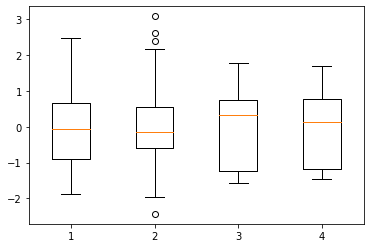

In [16]:
plt.boxplot(new_data)
plt.show()

### MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

new_data = MinMaxScaler().fit_transform(iris_df)
pd.DataFrame(new_data).describe().round(2)

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46
std,0.23,0.18,0.30,0.32
min,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08
50%,0.42,0.42,0.57,0.50
75%,0.58,0.54,0.69,0.71
max,1.00,1.00,1.00,1.00


### Boxplot

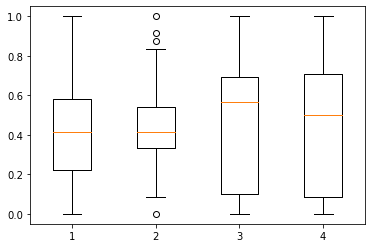

In [19]:
plt.boxplot(new_data)
plt.show()

### 데이타 섞기

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=123)

### Dataframe 만들기

In [23]:
df = pd.DataFrame(X_train, columns=iris.feature_names)
df['target'] = y_train
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,2.8,4.1,1.3,1
1,5.0,3.2,1.2,0.2,0
2,6.3,2.3,4.4,1.3,1
3,5.4,3.9,1.7,0.4,0
4,5.4,3.7,1.5,0.2,0


### IQL

In [24]:
Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1

min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

min, max

(1.8999999999999997, 4.3)

### 이상치 처리하기

In [28]:
target = df[(df['sepal width (cm)'] < min) |
           (df['sepal width (cm)'] > max)]
target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
46,5.7,4.4,1.5,0.4,0


In [29]:
df1 = df.drop(target.index)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.7,2.8,4.1,1.3,1
1,5.0,3.2,1.2,0.2,0
2,6.3,2.3,4.4,1.3,1
3,5.4,3.9,1.7,0.4,0
4,5.4,3.7,1.5,0.2,0
...,...,...,...,...,...
115,4.8,3.0,1.4,0.1,0
116,5.8,2.7,5.1,1.9,2
117,6.9,3.2,5.7,2.3,2
118,5.4,3.4,1.7,0.2,0
